In [1]:
import numpy as np
import time
import gc

In [2]:
from models.bayesian_conv_autoencoder import BayesianConvAutoencoder

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
import tensorflow as tf

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### 3 conv layers, 3 deconv layers, 3x3 filters, 10 filter outputs per layer

In [5]:
# n_datapoints, n_layers, neurons_per_layer, mc_samples, batch_size
vi = BayesianConvAutoencoder('BCAE', mc_samples=10, constant_prior=False)
vi.learn(learning_rate=0.001, epochs=50, mc_samples=10)
print('Test Log-Likelihood: %.6f' % vi.benchmark())

   [88.4] Epoch: 01 | NELBO: 13982576.008158 | ELL: -254.228648 | KL: 0.462991 | Val. ELL: -132.578907
   [86.3] Epoch: 02 | NELBO: 6546164.868298 | ELL: -119.021179 | KL: 0.142491 | Val. ELL: -108.689688
   [83.2] Epoch: 03 | NELBO: 5616286.184149 | ELL: -102.114294 | KL: 0.135207 | Val. ELL: -96.044026
   [83.3] Epoch: 04 | NELBO: 5095930.519814 | ELL: -92.653281 | KL: 0.138969 | Val. ELL: -88.957594
   [83.8] Epoch: 05 | NELBO: 4778806.829837 | ELL: -86.887397 | KL: 0.127510 | Val. ELL: -84.234061
   [83.1] Epoch: 06 | NELBO: 4533077.336830 | ELL: -82.419587 | KL: 0.135894 | Val. ELL: -80.216683
   [83.2] Epoch: 07 | NELBO: 4338782.631702 | ELL: -78.886957 | KL: 0.126091 | Val. ELL: -76.944167
   [83.3] Epoch: 08 | NELBO: 4179929.388695 | ELL: -75.998714 | KL: 0.149546 | Val. ELL: -74.461660
   [106.2] Epoch: 09 | NELBO: 4039826.693473 | ELL: -73.451391 | KL: 0.190095 | Val. ELL: -72.147802
   [98.6] Epoch: 10 | NELBO: 3920047.358974 | ELL: -71.273584 | KL: 0.231459 | Val. ELL: -70.

In [6]:
vi.serialize('DUMPS/bnn_conv_three/model.ckpt')

Model saved in file: DUMPS/bnn_conv_three/model.ckpt


In [5]:
vi = BayesianConvAutoencoder('BCAE', mc_samples=10, constant_prior=False)
vi.restore('DUMPS/bnn_conv_three/model.ckpt')

INFO:tensorflow:Restoring parameters from DUMPS/bnn_conv_three/model.ckpt


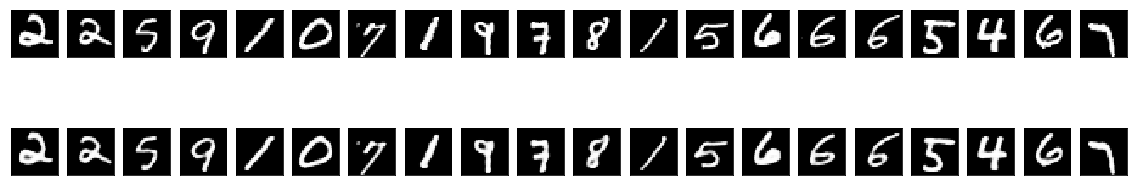

In [7]:
vi.plot_enc_dec(20, save=True)